In [3]:
# must for data analysis
% matplotlib inline
import numpy as np
import pandas as pd
from matplotlib.pyplot import *

# useful for data wrangling
import io, os, re, subprocess

# for sanity
from pprint import pprint

In [4]:
data_files = os.listdir('../input')
pprint(data_files)

['ca_law_enforcement_by_agency.csv',
 'ca_law_enforcement_by_campus.csv',
 'ca_law_enforcement_by_city.csv',
 'ca_law_enforcement_by_county.csv',
 'ca_offenses_by_agency.csv',
 'ca_offenses_by_campus.csv',
 'ca_offenses_by_city.csv',
 'ca_offenses_by_county.csv']


In [5]:
filename = 'ca_law_enforcement_by_campus.csv'
filewpath = "../input/"+filename

with open(filewpath) as f:
    lines = f.readlines()

# First 6 lines are part of the header
header = ' '.join(lines[:6])
header = re.sub('\n','',header)
data = lines[6:]

pprint([p.strip() for p in data[:10]])

['Allan Hancock College,,"11,047",10.0,5.0,5.0',
 'California State Polytechnic University,Pomona,"23,966",27.0,19.0,8.0',
 'California State Polytechnic University,San Luis '
 'Obispo,"20,186",33.0,17.0,16.0',
 'California State University,Bakersfield,"8,720",21.0,14.0,7.0',
 'California State University,Channel Islands,"5,879",28.0,14.0,14.0',
 'California State University,Chico,"17,287",25.0,14.0,11.0',
 'California State University,Dominguez Hills,"14,687",26.0,20.0,6.0',
 'California State University,East Bay,"14,823",26.0,15.0,11.0',
 'California State University,Fresno,"23,179",31.0,20.0,11.0',
 'California State University,Fullerton,"38,128",37.0,27.0,10.0']


In [6]:
number_of_commas = [len(re.findall(',',p)) for p in data]
print(number_of_commas)

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [7]:
# Parse each line with a regular expression
newlines = []
for p in data:
    if( len(re.findall(',,,,',p))==0):
        newlines.append(p)

pprint(newlines[:10])

['Allan Hancock College,,"11,047",10.0,5.0,5.0\n',
 'California State Polytechnic University,Pomona,"23,966",27.0,19.0,8.0\n',
 'California State Polytechnic University,San Luis '
 'Obispo,"20,186",33.0,17.0,16.0\n',
 'California State University,Bakersfield,"8,720",21.0,14.0,7.0\n',
 'California State University,Channel Islands,"5,879",28.0,14.0,14.0\n',
 'California State University,Chico,"17,287",25.0,14.0,11.0\n',
 'California State University,Dominguez Hills,"14,687",26.0,20.0,6.0\n',
 'California State University,East Bay,"14,823",26.0,15.0,11.0\n',
 'California State University,Fresno,"23,179",31.0,20.0,11.0\n',
 'California State University,Fullerton,"38,128",37.0,27.0,10.0\n']


In [8]:
one_string = '\n'.join(newlines)
sio = io.StringIO(one_string)

columnstr = header

# Get rid of \r stuff
columnstr = re.sub('\r',' ',columnstr)
columnstr = re.sub('\s+',' ',columnstr)

# Fix what can ONLY have been a typo, making this file un-parsable without superhuman regex abilities
columnstr = re.sub(',Campus','Campus',columnstr)

columns = columnstr.split(",")

df = pd.read_csv(sio,quotechar='"',header=None,  names=columns, thousands=',')
df

,University/College Campus,Student enrollment,Total law enforcement employees,Total officers,Total civilians
Allan Hancock College,NaN,11047,10.0,5.0,5.0
California State Polytechnic University,Pomona,23966,27.0,19.0,8.0
California State Polytechnic University,San Luis Obispo,20186,33.0,17.0,16.0
California State University,Bakersfield,8720,21.0,14.0,7.0
California State University,Channel Islands,5879,28.0,14.0,14.0
California State University,Chico,17287,25.0,14.0,11.0
California State University,Dominguez Hills,14687,26.0,20.0,6.0
California State University,East Bay,14823,26.0,15.0,11.0
California State University,Fresno,23179,31.0,20.0,11.0
California State University,Fullerton,38128,37.0,27.0,10.0


In [3]:
import seaborn as sns

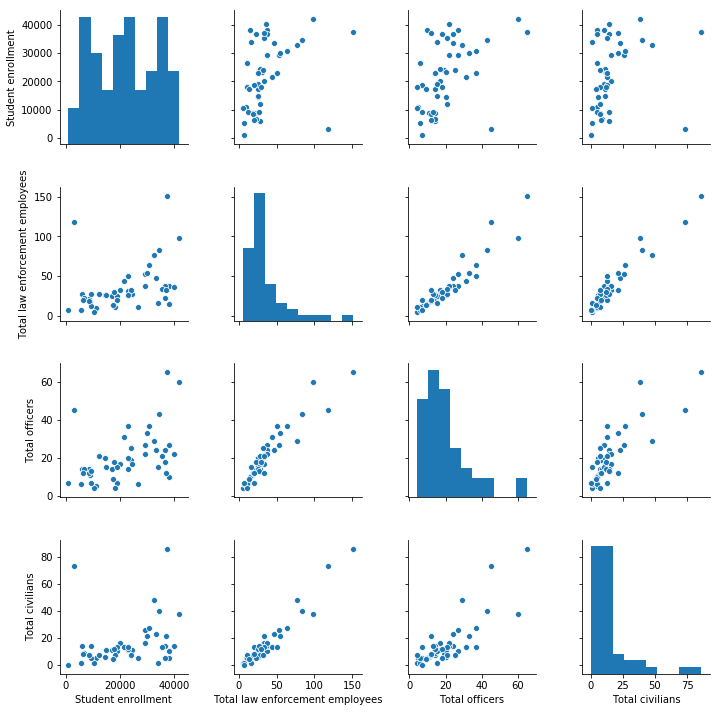

In [38]:
sns.pairplot(df)

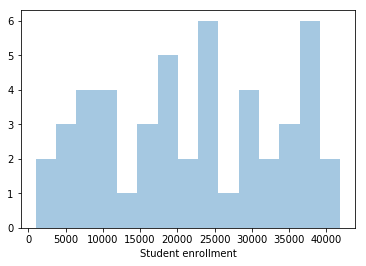

In [11]:
sns.distplot(df['Student enrollment'],bins=15,kde=False)

In [12]:
# Divide the schools into three size bins using quantiles
slice1 = np.percentile(df['Student enrollment'],q=33)
slice2 = np.percentile(df['Student enrollment'],q=66)

def school_size(enrollment):
    if enrollment < slice1:
        return 'Small'
    elif enrollment < slice2:
        return 'Medium'
    else:
        return 'Large'

df['Size'] = df['Student enrollment'].map(lambda x : school_size(x))

C:\Users\james\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


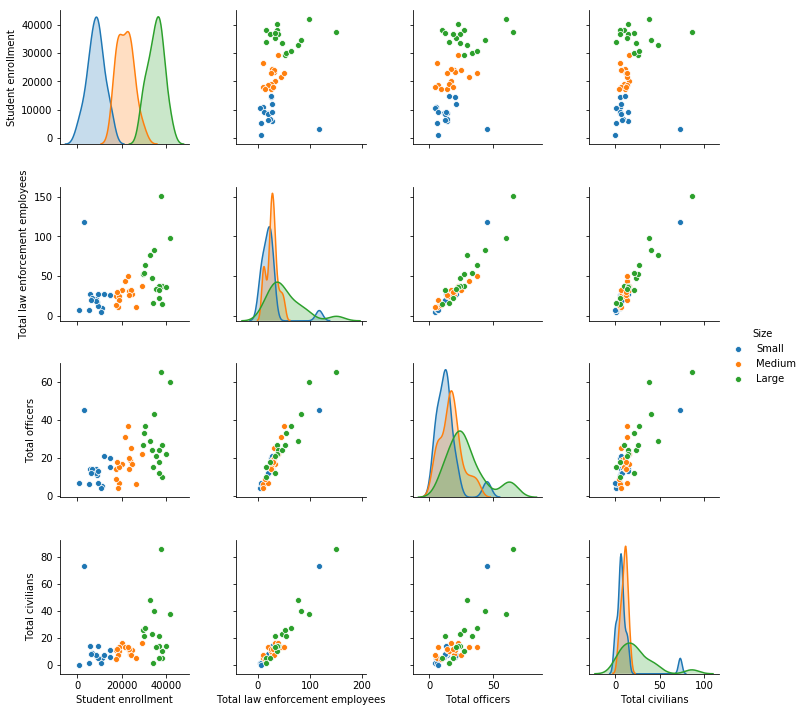

In [13]:
sns.pairplot(df, hue="Size")

In [14]:
def ca_law_enforcement_by_agency(data_directory):
    filename = 'ca_law_enforcement_by_agency.csv'

    # Load file into list of strings
    with open(data_directory + '/' + filename) as f:
        content = f.read()

    content = re.sub('\r',' ',content)
    [header,data] = content.split("civilians\"")
    header += "civilians\""
    
    data = data.strip()
    agencies = re.findall('\w+ Agencies', data)
    all_but_agencies = re.split('\w+ Agencies',data)
    del all_but_agencies[0]
    
    newlines = []
    for (a,aba) in zip(agencies,all_but_agencies):
        newlines.append(''.join([a,aba]))
    
    # Combine into one long string, and do more processing
    one_string = '\n'.join(newlines)
    sio = io.StringIO(one_string)
    
    # Process column names
    columnstr = header.strip()
    columnstr = re.sub('\s+',' ',columnstr)
    columnstr = re.sub('"','',columnstr)
    columns = columnstr.split(",")
    columns = [s.strip() for s in columns]

    # Load the whole thing into Pandas
    df = pd.read_csv(sio,quotechar='"',header=None,names=columns)

    return df


df1 = ca_law_enforcement_by_agency('../input/')
df1.head()

,State/Tribal/Other,Agency,Unit/Office,Total law enforcement employees,Total officers,Total civilians
0,State Agencies,Atascadero State Hospital,NaN,139,128,11
1,State Agencies,California State Fair,NaN,3,3,0
2,State Agencies,Coalinga State Hospital,NaN,228,210,18
3,State Agencies,Department of Parks and Recreation,Capital,560,530,30
4,State Agencies,Fairview Developmental Center,NaN,17,14,3


In [23]:
def ca_law_enforcement_by_campus(data_directory):
    filename = 'ca_law_enforcement_by_campus.csv'

    # Load file into list of strings
    with open(data_directory + '/' + filename) as f:
        lines = f.readlines()
    
    header = ' '.join(lines[:6])
    header = re.sub('\n','',header)
    data = lines[6:]
    
    # Process each string in the list
    newlines = []
    for p in data:
        if( len(re.findall(',,,,',p))==0):
            newlines.append(re.sub(r'^([^"]{1,})(,"[0-9])' ,  r'"\1"\2', p))

    # Combine into one long string, and do more processing
    one_string = '\n'.join(newlines)
    sio = io.StringIO(one_string)

    columnstr = header

    # Get rid of \r stuff
    columnstr = re.sub('\r',' ',columnstr)
    columnstr = re.sub('\s+',' ',columnstr)

    # Fix what can ONLY have been a typo, making this file un-parsable without superhuman regex abilities
    columnstr = re.sub(',Campus','Campus',columnstr)

    columns = columnstr.split(",")

    df = pd.read_csv(sio,quotechar='"',header=None,  names=columns, thousands=',')

    return df


df2 = ca_law_enforcement_by_campus('../input/')
df2

,University/College Campus,Student enrollment,Total law enforcement employees,Total officers,Total civilians
0,"Allan Hancock College,",11047,10.0,5.0,5.0
1,"California State Polytechnic University,Pomona",23966,27.0,19.0,8.0
2,"California State Polytechnic University,San Lu...",20186,33.0,17.0,16.0
3,"California State University,Bakersfield",8720,21.0,14.0,7.0
4,"California State University,Channel Islands",5879,28.0,14.0,14.0
5,"California State University,Chico",17287,25.0,14.0,11.0
6,"California State University,Dominguez Hills",14687,26.0,20.0,6.0
7,"California State University,East Bay",14823,26.0,15.0,11.0
8,"California State University,Fresno",23179,31.0,20.0,11.0
9,"California State University,Fullerton",38128,37.0,27.0,10.0


In [9]:
def ca_law_enforcement_by_city(data_directory):
    filename = 'ca_law_enforcement_by_city.csv'

    # Load file into list of strings
    with open(data_directory + '/' + filename) as f:
        content = f.read()

    content = re.sub('\r',' ',content)
    [header,data] = content.split("civilians\"")
    header += "civilians\""
    
    data = data.strip()
        
    # Combine into one long string, and do more processing
    one_string = re.sub(r'([0-9]) ([A-Za-z])',r'\1\n\2',data)
    sio = io.StringIO(one_string)
    
    # Process column names
    columnstr = header.strip()
    columnstr = re.sub('\s+',' ',columnstr)
    columnstr = re.sub('"','',columnstr)
    columns = columnstr.split(",")

    # Load the whole thing into Pandas
    df = pd.read_csv(sio,quotechar='"', header=None, names=columns, thousands=',')

    return df


df3 = ca_law_enforcement_by_city('../input/')
df3.head()

,City,Population,Total law enforcement employees,Total officers,Total civilians
0,Alameda,78613,112,83,29
1,Albany,19723,30,23,7
2,Alhambra,86175,128,85,43
3,Alturas,2566,6,5,1
4,Anaheim,349471,577,399,178


In [14]:
def ca_law_enforcement_by_county(data_directory):
    filename = 'ca_law_enforcement_by_county.csv'

    # Load file into list of strings
    with open(data_directory + '/' + filename) as f:
        content = f.read()

    content = re.sub('\r',' ',content)
    [header,data] = content.split("civilians\"")
    header += "civilians\""
    
    data = data.strip()
        
    # Combine into one long string, and do more processing
    one_string = re.sub(r'([0-9]) ([A-Za-z])',r'\1\n\2',data)
    sio = io.StringIO(one_string)
    
    # Process column names
    columnstr = header.strip()
    columnstr = re.sub('\s+',' ',columnstr)
    columnstr = re.sub('"','',columnstr)
    columns = columnstr.split(",")

    # Load the whole thing into Pandas
    df = pd.read_csv(sio,quotechar='"',header=None,names=columns,thousands=',')

    return df


df4 = ca_law_enforcement_by_county('../input/')
df4.head()

,Metropolitan/Nonmetropolitan,County,Total law enforcement employees,Total officers,Total civilians
0,Metropolitan Counties,Alameda,1560,978,582
1,Metropolitan Counties,Butte,288,101,187
2,Metropolitan Counties,Contra Costa,936,610,326
3,Metropolitan Counties,El Dorado,349,164,185
4,Metropolitan Counties,Fresno,1043,406,637


In [13]:
def ca_offenses_by_agency(data_directory):
    filename = 'ca_offenses_by_agency.csv'

    # Load file into list of strings
    with open(data_directory + '/' + filename) as f:
        lines = f.readlines()
    
    one_line = '\n'.join(lines[1:])
    sio = io.StringIO(one_line)
    
    # Process column names
    columnstr = lines[0].strip()
    columnstr = re.sub('\s+',' ',columnstr)
    columnstr = re.sub('"','',columnstr)
    columns = columnstr.split(",")
    
    # Load the whole thing into Pandas
    df = pd.read_csv(sio,quotechar='"',names=columns, thousands=',')

    return df

df5 = ca_offenses_by_agency('../input/')
df5

,State/Tribal/Other,Agency,Unit/Office,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,State Agencies,Atascadero State Hospital4,NaN,321.0,0.0,0.0,NaN,0.0,321.0,4.0,0.0,2.0,2.0,0.0
1,State Agencies,California State Fair4,NaN,12.0,0.0,0.0,NaN,0.0,12.0,79.0,21.0,56.0,2.0,1.0
2,State Agencies,Coalinga State Hospital,NaN,149.0,0.0,0.0,NaN,0.0,149.0,3.0,1.0,2.0,0.0,0.0
3,State Agencies,Department of Parks and Recreation,Angeles,2.0,0.0,0.0,NaN,1.0,1.0,26.0,8.0,18.0,0.0,0.0
4,State Agencies,Department of Parks and Recreation,Bay Area,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,State Agencies,Department of Parks and Recreation,Calaveras County4,1.0,0.0,0.0,NaN,0.0,1.0,2.0,2.0,0.0,0.0,0.0
6,State Agencies,Department of Parks and Recreation,Capital,0.0,0.0,0.0,NaN,0.0,0.0,7.0,2.0,5.0,0.0,1.0
7,State Agencies,Department of Parks and Recreation,Channel Coast,0.0,0.0,0.0,NaN,0.0,0.0,16.0,3.0,13.0,0.0,0.0
8,State Agencies,Department of Parks and Recreation,Colorado,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,State Agencies,Department of Parks and Recreation,Four Rivers District,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [24]:
def ca_offenses_by_campus(data_directory):
    filename = 'ca_offenses_by_campus.csv'

    # Load file into list of strings
    with open(data_directory + '/' + filename) as f:
        lines = f.readlines()
    
    # Process each string in the list
    newlines = []
    for p in lines[1:]:
        if( len(re.findall(',,,,',p))==0):
            # This is a weird/senseless/badly formatted line
            if( len(re.findall('Medical Center, Sacramento5',p))==0):
                newlines.append(re.sub(r'^([^"]{1,})(,"[0-9])' ,  r'"\1"\2', p))

    one_line = '\n'.join(newlines)
    sio = io.StringIO(one_line)
    
    # Process column names
    columnstr = lines[0].strip()
    columnstr = re.sub('\s+',' ',columnstr)
    columnstr = re.sub('"','',columnstr)
    columnstr = re.sub(',Campus','Campus',columnstr)
    columns = columnstr.split(",")
    
    # Load the whole thing into Pandas
    df = pd.read_csv(sio, quotechar='"', thousands=',', names=columns)
    
    return df

df6 = ca_offenses_by_campus('../input/')
df6

,University/CollegeCampus,Student enrollment,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,"Allan Hancock College,",11047,0,0,0,NaN,0,0,21,2,18,1,0
1,"California State Polytechnic University,Pomona",23966,6,0,4,NaN,1,1,173,5,150,18,1
2,"California State Polytechnic University,San Lu...",20186,3,0,2,NaN,0,1,163,7,149,7,1
3,"California State University,Bakersfield",8720,1,0,0,NaN,0,1,78,12,65,1,0
4,"California State University,Channel Islands",5879,2,0,0,NaN,1,1,62,7,54,1,0
5,"California State University,Chico4",17287,7,0,3,NaN,1,3,254,13,235,6,2
6,"California State University,Dominguez Hills",14687,4,0,0,NaN,0,4,72,5,65,2,0
7,"California State University,East Bay",14823,2,0,2,NaN,0,0,97,11,80,6,0
8,"California State University,Fresno",23179,13,0,3,NaN,3,7,267,43,209,15,1
9,"California State University,Fullerton4",38128,8,0,3,NaN,1,4,248,22,218,8,0


In [20]:
def ca_offenses_by_city(data_directory):
    filename = 'ca_offenses_by_city.csv'

    # Load file into list of strings
    with open(data_directory + '/' + filename) as f:
        content = f.read()
    
    lines = content.split('\n')
    one_line = '\n'.join(lines[1:])
    sio = io.StringIO(one_line)
    
    # Process column names
    columnstr = lines[0].strip()
    columnstr = re.sub('\s+',' ',columnstr)
    columnstr = re.sub('"','',columnstr)
    columns = columnstr.split(",")
    
    # Load the whole thing into Pandas
    df = pd.read_csv(sio,quotechar='"',names=columns,thousands=',')

    return df

df7 = ca_offenses_by_city('../input/')
df7.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Adelanto,33005,212,2,14,NaN,48,148,808,434,254,120,24
1,Agoura Hills,20970,15,0,1,NaN,6,8,310,82,217,11,0
2,Alameda,78613,148,2,7,NaN,61,78,1819,228,1245,346,18
3,Albany,19723,34,1,6,NaN,16,11,605,95,447,63,0
4,Alhambra3,86175,168,1,13,NaN,74,80,1929,305,1413,211,6


In [21]:
def ca_offenses_by_county(data_directory):
    filename = 'ca_offenses_by_county.csv'

    # Load file into list of strings
    with open(data_directory + '/' + filename) as f:
        lines = f.readlines()
    
    one_line = '\n'.join(lines[1:])
    sio = io.StringIO(one_line)
    
    # Process column names
    columnstr = lines[0].strip()
    columnstr = re.sub('\s+',' ',columnstr)
    columnstr = re.sub('"','',columnstr)
    columns = columnstr.split(",")
    
    # Load the whole thing into Pandas
    df = pd.read_csv(sio,quotechar='"',names=columns,thousands=',')

    return df

df8 = ca_offenses_by_county('../input/')
df8.head()

,Metropolitan/Nonmetropolitan,County,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape(legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Metropolitan Counties,Alameda,510.0,6.0,13.0,NaN,177.0,314.0,2077.0,463.0,985.0,629.0,11.0
1,Metropolitan Counties,Butte3,155.0,4.0,20.0,NaN,14.0,117.0,1422.0,708.0,693.0,21.0,0.0
2,Metropolitan Counties,Contra Costa,426.0,14.0,24.0,NaN,153.0,235.0,2013.0,660.0,1332.0,21.0,18.0
3,Metropolitan Counties,El Dorado3,252.0,9.0,46.0,NaN,32.0,165.0,2031.0,577.0,1412.0,42.0,4.0
4,Metropolitan Counties,Fresno,962.0,8.0,32.0,NaN,112.0,810.0,3810.0,1398.0,1838.0,574.0,145.0
